In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 


In [2]:
np.random.seed(101) 
tf.set_random_seed(101) 


In [3]:
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 

# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 

n = len(x) # Number of data points 


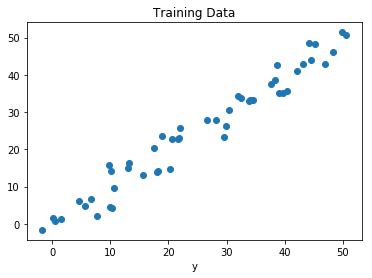

In [4]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 


In [5]:
X = tf.placeholder("float") 
x = (x - np.mean(x)) / np.std(x)
Y = tf.placeholder("float") 

In [6]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 


In [7]:
learning_rate = 0.01
training_epochs = 1000


In [8]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 

# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 


In [9]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
	
	# Initializing the Variables 
	sess.run(init) 
	
	# Iterating through all the epochs 
	for epoch in range(training_epochs): 
		
		# Feeding each data point into the optimizer using Feed Dictionary 

		sess.run(optimizer, feed_dict = {X : x, Y : y}) 
		
		# Displaying the result after every 50 epochs 
		if (epoch + 1) % 50 == 0: 
			# Calculating the cost a every epoch 
			c = sess.run(cost, feed_dict = {X : x, Y : y}) 
			print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
	
	# Storing necessary values to be used outside the Session 
	training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
	weight = sess.run(W) 
	bias = sess.run(b) 


Epoch 50 : cost = 152.2749 W = 5.2457337 b = 10.572481
Epoch 100 : cost = 58.789974 W = 9.052741 b = 16.186768
Epoch 150 : cost = 24.571465 W = 11.356006 b = 19.583445
Epoch 200 : cost = 12.046374 W = 12.749495 b = 21.638458
Epoch 250 : cost = 7.4617896 W = 13.592563 b = 22.881756
Epoch 300 : cost = 5.7836986 W = 14.102624 b = 23.63395
Epoch 350 : cost = 5.1694627 W = 14.411215 b = 24.08903
Epoch 400 : cost = 4.94463 W = 14.597914 b = 24.364357
Epoch 450 : cost = 4.862333 W = 14.710869 b = 24.53094
Epoch 500 : cost = 4.83221 W = 14.779205 b = 24.631718
Epoch 550 : cost = 4.821183 W = 14.820552 b = 24.692692
Epoch 600 : cost = 4.8171477 W = 14.845565 b = 24.72958
Epoch 650 : cost = 4.8156714 W = 14.860698 b = 24.751892
Epoch 700 : cost = 4.8151298 W = 14.869855 b = 24.765398
Epoch 750 : cost = 4.8149314 W = 14.875393 b = 24.773565
Epoch 800 : cost = 4.81486 W = 14.878744 b = 24.778513
Epoch 850 : cost = 4.8148336 W = 14.880772 b = 24.7815
Epoch 900 : cost = 4.8148236 W = 14.881999 b = 2

In [10]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


Training cost = 4.8148184 Weight = 14.883189 bias = 24.785065 



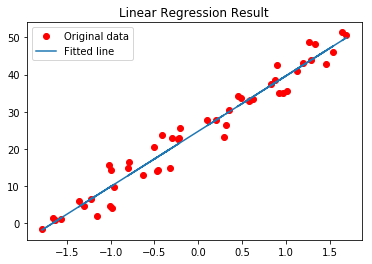

In [11]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 
